# Using Pima dataset for classification

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/dantohe/Development/Projects/Springboard/datasets/Pima_Indians_Diabetes/diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Pick a subset of features

In [9]:
feature_columns = ['Pregnancies','Insulin','BMI','Age']
x= df[feature_columns]
y = df.Outcome


In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  768 non-null    int64  
 1   Insulin      768 non-null    int64  
 2   BMI          768 non-null    float64
 3   Age          768 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 24.1 KB


In [13]:
y.head

<bound method NDFrame.head of 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64>

### Splitting in training and testing    
By default train_test_split will allocate 25% of the data set to testing.  

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [15]:
x_train.shape

(576, 4)

In [16]:
y_train.shape

(576,)

In [17]:
x_test.shape

(192, 4)

### Using logistic regression for learning.   

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [21]:
#fitting
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [23]:
#class prediction
y_pred_class = lr.predict(x_test)

In [25]:
#these are the predictions from the model
y_pred_class


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Calculate the classification accurcy    
How many were correctly classified.   

In [27]:
print(accuracy_score(y_test, y_pred_class))

0.6770833333333334


### The NULL ACCURACY     
The accuracy achieved by allways predicting the most frequent class.    

In [28]:
y_test.count()

192

In [29]:
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [30]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [31]:
#how many ones are there

In [32]:
y_test.mean()

0.3229166666666667

In [33]:
1-y_test.mean()

0.6770833333333333

In [34]:
## null accuracy - for binary class
max(y_test.mean(),1-y_test.mean())

0.6770833333333333

In [35]:
## null accuracy - for multi class
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: Outcome, dtype: float64

### Comfusion Matrix    
ACTUAL, PREDICTED !!!!!

In [37]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred_class))

[[114  16]
 [ 46  16]]


In [38]:
 confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)

In [39]:
tp = confusion_matrix[1,1]
tn = confusion_matrix[0,0]
fn = confusion_matrix[1,0]
fp = confusion_matrix[0,1]

### Accuracy

In [40]:
accuracy = (tp+tn)*1.0/(tp+tn+fp+fn)
print(accuracy)

0.6770833333333334


In [41]:
print(metrics.accuracy_score(y_test,y_pred_class))

0.6770833333333334


### Classification error

In [43]:
classification_error = 1 - accuracy
print(1-metrics.accuracy_score(y_test,y_pred_class))

0.32291666666666663


### Sensitivity - RECALL     
When the value is positive how many times is it predicted correctly.

In [45]:
sensitivity = tp*1.0/(tp+fn)
print(metrics.recall_score(y_test,y_pred_class))

0.25806451612903225


### Speciicity     
When the value is negative how often is predicted corectly.

In [47]:
speciicity = tn*1.0/(tn+fp)
print(speciicity)

0.8769230769230769


### Precision     
When te value is predicted how oten is it predicted correctly.

In [49]:
precision = tp *1.0/(tp+fp)
precision

0.5

In [50]:
print(metrics.precision_score(y_test,y_pred_class))

0.5


In [51]:
lr.predict(x_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [52]:
lr.predict_proba(x_test)[0:10]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [53]:
lr.predict_proba(x_test)[0:10, 1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [54]:
y_pred_prob = lr.predict_proba(x_test)[0:10, 1]

In [56]:
import matplotlib.pyplot as plt
# plt.rcParams['font.size'=14]

(0.0, 1.0)

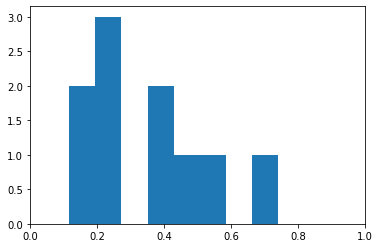

In [61]:
plt.hist(y_pred_prob, bins =8)
plt.xlim(0,1)

### Decrese the treshhold - increase sensitivity 

In [62]:
from sklearn.preprocessing import binarize


### AUC

In [64]:
# from sklearn.cross_validation 
metrics.roc_auc_score(y_test, y_pred_class)

0.5674937965260546

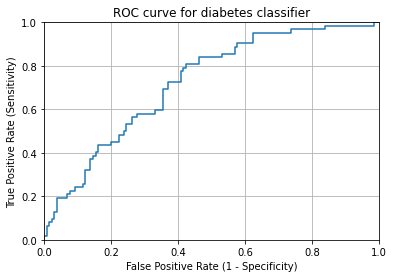

In [67]:
y_pred_prob = lr.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [68]:
print(metrics.roc_auc_score(y_test, y_pred_prob))


0.7227047146401985


In [71]:

# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(lr, x, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225